In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
from data import MePicsSet
from display import show_keypoints
import torch
from torch.utils.data import DataLoader
from learn import test
import numpy as np
import morph, utils
from pathlib import Path
import my_types as mt

In [28]:
OUT_DIR = Path("output")

In [85]:
april_dataset = MePicsSet()
april_loader = DataLoader(april_dataset, batch_size=8, shuffle=False)

In [200]:
model3_path = max(OUT_DIR.glob("model3*"), key=lambda p: Path(p).stat().st_mtime)
model3 = torch.load(model3_path, map_location="cpu")
print(f"loaded {model3_path}")

loaded output/model3.pt


In [201]:
april_imgs, april_preds = test(april_loader, model3)

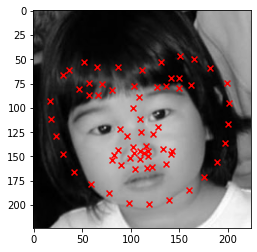

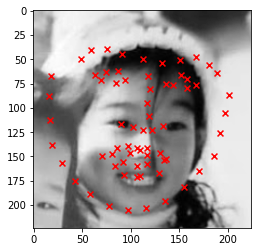

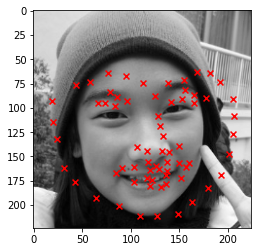

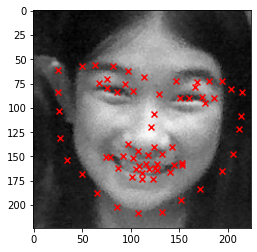

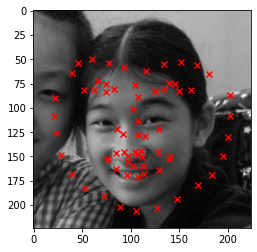

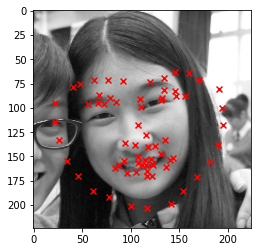

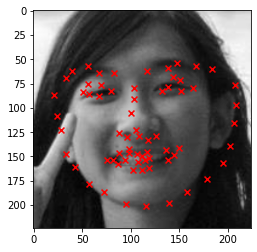

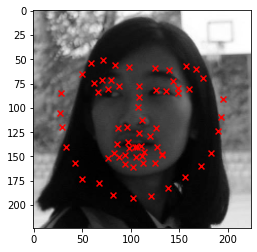

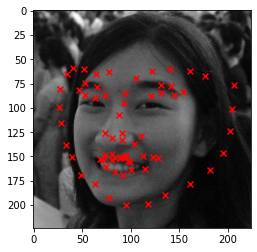

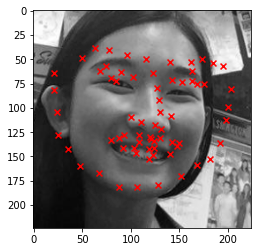

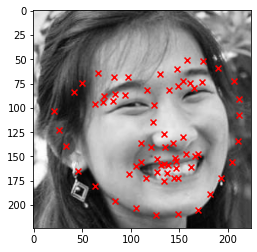

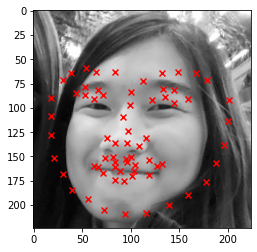

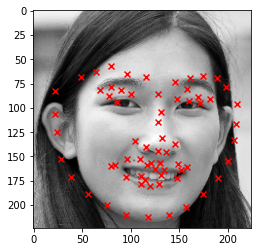

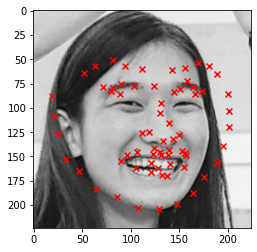

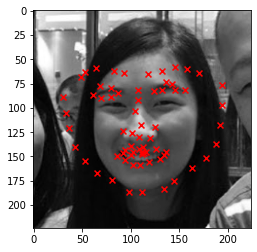

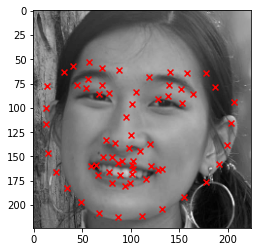

In [220]:
for i, p in zip(april_imgs, april_preds):
    show_keypoints(image=i, truth_points=None, pred_points=p)

In [215]:
# make tensors into numpys
# april_pts = [t.cpu().detach().numpy() for t in april_preds]
april_pts = [april_dataset.get_original_pts(i, april_preds[i]) for i in range(len(april_dataset))]

In [216]:
i = 5
print(april_pts[i])
# r = mt.to_ratios(april_pts[i], w, h)

[[ 863.29376  996.72314]
 [ 863.2933  1175.9261 ]
 [ 863.3475  1346.877  ]
 [ 863.4538  1539.0205 ]
 [ 863.60864 1682.5804 ]
 [ 863.8226  1821.3981 ]
 [ 864.03937 1880.5981 ]
 [ 864.33984 1968.7906 ]
 [ 864.56726 1978.6405 ]
 [ 864.88715 1948.3585 ]
 [ 865.05817 1818.8251 ]
 [ 865.24805 1692.4221 ]
 [ 865.436   1553.5054 ]
 [ 865.5425  1388.7526 ]
 [ 865.60864 1198.3445 ]
 [ 865.59766 1039.4504 ]
 [ 865.56036  860.9246 ]
 [ 863.5356   847.36786]
 [ 863.6369   817.292  ]
 [ 863.8317   779.9706 ]
 [ 864.0266   781.47064]
 [ 864.2264   790.88074]
 [ 864.5967   799.28644]
 [ 864.79474  760.4502 ]
 [ 864.94604  705.6468 ]
 [ 865.1384   714.06195]
 [ 865.2786   777.56354]
 [ 864.45984  956.1662 ]
 [ 864.48206 1027.083  ]
 [ 864.4328  1200.6747 ]
 [ 864.54407 1298.6718 ]
 [ 864.25977 1372.6097 ]
 [ 864.40076 1388.674  ]
 [ 864.58057 1409.3212 ]
 [ 864.6701  1399.3301 ]
 [ 864.8033  1345.1946 ]
 [ 863.74225 1000.12573]
 [ 863.9062   916.2021 ]
 [ 864.0463   943.8384 ]
 [ 864.1377   987.8121 ]


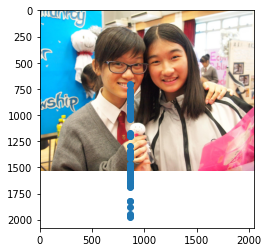

In [219]:
import matplotlib.pyplot as plt
i = 5
im = april_dataset.get_original_img(i)
plt.imshow(im)
plt.scatter(april_pts[i][:, 0], april_pts[i][:, 1])

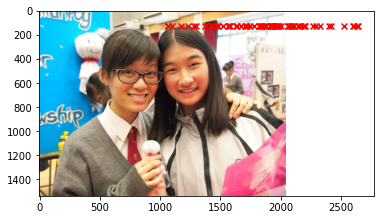

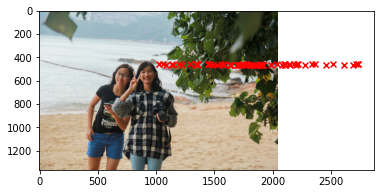

In [182]:
# for i in range(len(april_dataset)):
for i in [5, 6]:
    im = april_dataset.get_original_img(i)
    h, w, _ = im.shape
    p = april_dataset.get_original_pts(i, april_preds[i])
    p = mt.to_ratios(p, w, h)
    show_keypoints(image=im, truth_points=None, pred_points=p, ratio=True, color=True)

In [ ]:
import data, my_types
import my_types as mt

morph_imgs = []
morph_pts = []
corners = np.array([[0, 0], [0, 499/500], [499/500, 0], [499/500, 499/500]])
# for i in range(len(april_dataset)):
for i in [0, 1]:
    im = mt.to_img_arr(april_dataset.get_morph_img(i))
    morph_imgs.append(im)

    pred_pts = mt.to_points(april_preds[i])
    pts = april_dataset.get_morph_pts(i, pred_pts)
    # pts = np.vstack((pred_pts, corners))
#     my_types.assert_points(pts)
    morph_pts.append(pts)
    
    print(im.shape)
    show_keypoints(im, pts, color=True)


middle, _, _ = morph.compute_middle_object(
    morph_imgs[0], morph_imgs[1], morph_pts[0], morph_pts[1], alpha=0.5
)
plt.imshow(middle)

In [ ]:
filename = OUT_DIR / f"morph_{time.time()}.mp4"

me1, me2 = morph_imgs[0], morph_imgs[1]
pts1, pts2 = morph_pts[0], morph_pts[1]
# morph.compute_middle_object(me1, me2, pts1, pts2, alpha=0.5)
# morph.compute_morph_video(me1, me2, pts1, pts2, filename)